In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import numpy as np
from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
def norm(df):
    return (df-df.min())/(df.max()-df.min())

def denorm(df,max_x,min_x):
    return df*(max_x-min_x) + min_x

def adjustedR2(r2,n,p):
    return (1-(1-r2)*((n-1)/(n-p-1)))

import pickle
def loadPickle(name):
    return pickle.load(open('pickles/{}.pickle'.format(name),'rb'))


def reWriteTicks(ticks):
    for i in range(len(ticks)):
        tick = ticks[i].split('_')
        if len(tick)==2:
            supportType = tick[0]
            if supportType == 'ds':
                ticks[i] = tick[1].capitalize()+' ({})'.format('Df')
            elif supportType =='s':
                ticks[i] = tick[1].capitalize()+' ({})'.format('A')
        elif ticks[i]=='domsup':
            ticks[i]='Domestic'
    return ticks


new_headers = loadPickle('new_headers')
    
def setplot(plt,ax):

    ax.spines["top"].set_visible(False)  
    ax.spines["bottom"].set_visible(False)  
    ax.spines["right"].set_visible(False)  
    ax.spines["left"].set_visible(False)

    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()  
    return plt,ax

In [3]:
fname='regression_v.csv'
headers=open(fname,'r').readline().strip().split(',')
n=len(headers)

df = pd.read_csv(fname,low_memory=False,usecols=[i for i in range(0,n)],header=None)
df = df.replace('',np.nan, regex=True)

df.dropna(how='any', inplace=True)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.866667,1.000000,0.866667,0.866667,1.000000,1.000000,1.000000,1.000000,1.000000,0.133333,...,0.133333,0.133333,1.000000,1.000000,0.294118,0.470588,0.222222,0.277778,1.0,9
1,0.933333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.933333,1.000000,...,0.066667,1.000000,1.000000,0.000000,0.400000,0.200000,0.200000,0.400000,1.0,5
2,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.400000,0.200000,0.571429,0.142857,0.0,4
3,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.388889,0.444444,0.800000,0.400000,1.0,5
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.407407,0.629630,0.600000,0.533333,1.0,52
5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.384615,0.384615,0.400000,0.400000,1.0,1
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.388889,0.444444,0.263158,0.315789,1.0,4
7,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.294118,0.470588,0.222222,0.277778,0.0,8
8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.971014,1.000000,0.000000,0.333333,0.291667,0.600000,0.600000,1.0,23
11,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.450000,0.400000,0.380952,0.238095,1.0,12


In [4]:
X = df.drop(23, axis=1)
maxBRD = X[22].max()
minBRD = X[22].min()
X[22]=(X[22]-X[22].min())/(X[22].max()-X[22].min())


y = df[23]
y_org = df[23]
maxYear = y.max()
minYear = y.min()
y=(y-y.min())/(y.max()-y.min())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
X

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.866667,1.000000,0.866667,0.866667,1.000000,1.000000,1.000000,1.000000,1.000000,0.133333,...,1.000000,0.133333,0.133333,1.000000,1.000000,0.294118,0.470588,0.222222,0.277778,0.026316
1,0.933333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.933333,1.000000,...,1.000000,0.066667,1.000000,1.000000,0.000000,0.400000,0.200000,0.200000,0.400000,0.026316
2,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.400000,0.200000,0.571429,0.142857,0.000000
3,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.388889,0.444444,0.800000,0.400000,0.026316
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.407407,0.629630,0.600000,0.533333,0.026316
5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.384615,0.384615,0.400000,0.400000,0.026316
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.388889,0.444444,0.263158,0.315789,0.026316
7,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.294118,0.470588,0.222222,0.277778,0.000000
8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.836957,1.000000,0.971014,1.000000,0.000000,0.333333,0.291667,0.600000,0.600000,0.026316
11,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.450000,0.400000,0.380952,0.238095,0.026316


In [5]:
# linear regression

lr = LinearRegression()
lr.fit(X_train, y_train)
print('Intercept from library:', lr.intercept_)
print('Slope from library:', lr.coef_[0])

y_predict = lr.predict(X_test)
# Complete data
mse = mean_squared_error(y_test,y_predict)
var_error = explained_variance_score(y_test,y_predict)
r2 = r2_score(y_test,y_predict)


print(mse,var_error,r2)

Intercept from library: 0.400307313994
Slope from library: -0.0267821258105
0.0384769009923 0.182557384838 0.162307449134


In [83]:
X_voilence = df[22]
X_voilence = [[i] for i in X_voilence]

In [6]:
reg = linear_model.BayesianRidge()
reg.fit(X, y)
y_predict_norm = reg.predict(X)
# Complete data
y_predict_denorm = denorm(y_predict_norm,maxYear,minYear)
y_denorm = denorm(y,maxYear,minYear)

mse = mean_squared_error(y_denorm,y_predict_denorm)
mse_norm = mean_squared_error(y,y_predict_norm)
var_error = explained_variance_score(y_denorm,y_predict_denorm)
r2 = r2_score(y_denorm,y_predict_denorm)

print(mse**0.5,mse_norm**0.5,var_error,r2,adjustedR2(r2,len(y),23))

9.31004961823 0.182549992514 0.33327093597 0.33327093597 0.260594308137


In [7]:
reg = linear_model.BayesianRidge(compute_score=True)
reg.fit(X_train, y_train)

y_predict_norm,std = reg.predict(X_test,return_std=True)
y_predict_denorm = denorm(y_predict_norm,maxYear,minYear)
y_test_denorm = denorm(y_test,maxYear,minYear)

mse_norm = mean_squared_error(y_test,y_predict_norm)
mse = mean_squared_error(y_test_denorm,y_predict_denorm)
var_error = explained_variance_score(y_test_denorm,y_predict_denorm)
r2 = r2_score(y_test_denorm,y_predict_denorm)


print(mse**0.5,mse_norm**0.5,var_error,r2,0.002*(maxYear-minYear)+minYear)

9.90303124584 0.194177083252 0.185819074893 0.179118413097 1.102


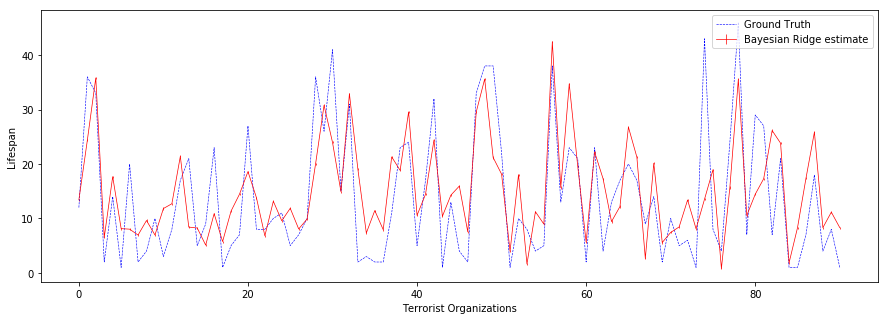

In [18]:
plt.subplots(figsize=(15,5))
plt.plot(list(range(len(y_predict_denorm))),y_test_denorm,linewidth=0.6,label='Ground Truth',linestyle='--',color='b')
plt.errorbar(list(range(len(y_predict_denorm))), y_predict_denorm,std,  linewidth=0.7,label='Bayesian Ridge estimate',color='r')

#plt.scatter(list(range(len(y_predict_denorm))), y_predict_denorm, label='Bayesian Ridge estimate',color='r')
plt.ylabel("Lifespan")
plt.xlabel("Terrorist Organizations")
plt.legend(loc='upper right')
plt.show()

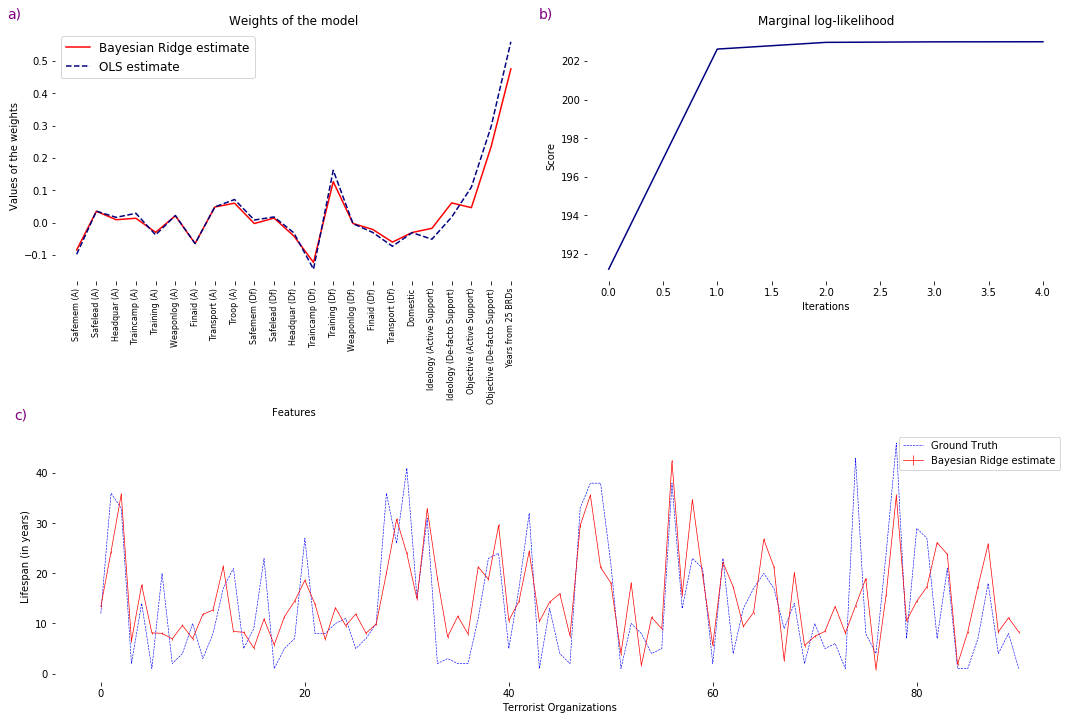

In [43]:
plt.close()
plt.figure(figsize = (15,10))
gs = gridspec.GridSpec(2,2)

ax = plt.subplot(gs[0,0:1])
plt,ax = setplot(plt,ax)
ax.text(-0.1, 1.05, 'a)', transform=ax.transAxes, size=14,color='purple')
plt.title("Weights of the model")
plt.plot(reg.coef_, color='r', 
         label="Bayesian Ridge estimate")
# plt.plot(w, color='gold', label="Ground truth")
plt.plot(lr.coef_, color='navy', linestyle='--', label="OLS estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
new_headers[-2] = 'Years from 25 BRDs'
plt.xticks(list(range(len(reg.coef_))),reWriteTicks(new_headers),rotation=90,size=8)
plt.legend(loc="best", prop=dict(size=12))

ax = plt.subplot(gs[0,1:2])
ax.text(-0.1, 1.05, 'b)', transform=ax.transAxes, size=14,color='purple')
plt,ax = setplot(plt,ax)
plt.title("Marginal log-likelihood")
plt.plot(reg.scores_, color='navy')
plt.ylabel("Score")
plt.xlabel("Iterations")

ax = plt.subplot(gs[1,0:2])
ax.text(-0.04, 1.05, 'c)', transform=ax.transAxes, size=14,color='purple')
plt,ax = setplot(plt,ax)
plt.plot(list(range(len(y_predict_denorm))),y_test_denorm,linewidth=0.6,label='Ground Truth',linestyle='--',color='b')
plt.errorbar(list(range(len(y_predict_denorm))), y_predict_denorm,std,  linewidth=0.7,label='Bayesian Ridge estimate',color='r')

#plt.scatter(list(range(len(y_predict_denorm))), y_predict_denorm, label='Bayesian Ridge estimate',color='r')
plt.ylabel("Lifespan (in years)")
plt.xlabel("Terrorist Organizations")
plt.legend(loc='upper right')

plt.tight_layout()
plt.savefig('paperImages/prediction.png',bbox_inches='tight')
plt.show()

In [40]:
reg.scores_

[]

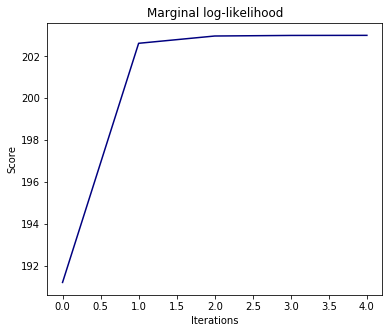

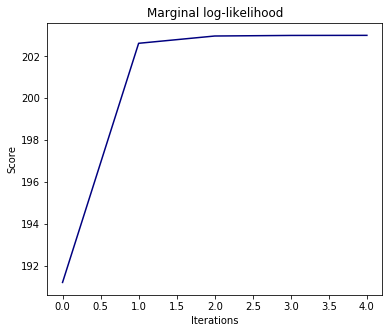

In [21]:
plt.figure(figsize=(6, 5))
plt.title("Marginal log-likelihood")
plt.plot(reg.scores_, color='navy')
plt.ylabel("Score")
plt.xlabel("Iterations")
plt.show()

In [46]:
np.linspace(0, 11, 25)

array([ 0.        ,  0.45833333,  0.91666667,  1.375     ,  1.83333333,
        2.29166667,  2.75      ,  3.20833333,  3.66666667,  4.125     ,
        4.58333333,  5.04166667,  5.5       ,  5.95833333,  6.41666667,
        6.875     ,  7.33333333,  7.79166667,  8.25      ,  8.70833333,
        9.16666667,  9.625     , 10.08333333, 10.54166667, 11.        ])

In [ ]:
X = np.linspace(0, 10, 100)
y = f(X, noise_amount=0.1)
clf_poly = BayesianRidge()
clf_poly.fit(np.vander(X, degree), y)

X_plot = np.linspace(0, 11, 25)
y_plot = reg.predict()
y_mean, y_std = clf_poly.predict(np.vander(X_plot, degree), return_std=True)
plt.figure(figsize=(6, 5))
plt.errorbar(X_plot, y_mean, y_std, color='navy',
             label="Polynomial Bayesian Ridge Regression", linewidth=lw)
plt.plot(X_plot, y_plot, color='gold', linewidth=lw,
         label="Ground Truth")
plt.ylabel("Output y")
plt.xlabel("Feature X")
plt.legend(loc="lower left")
plt.show()

In [36]:
def predictThrivingYears(x,y,z,a,b,c): 
    activeSupportDeprivation = x
    defactoSupportDeprivation = y
    domesticSupportDeprivation = z
    Support_Ideology = a
    Support_Objective = b
    BRD_After_Years = (c - minBRD)/(maxBRD-minBRD)


    temp = [activeSupportDeprivation]*9 + [defactoSupportDeprivation]*8 + [domesticSupportDeprivation]
    temp = temp + [Support_Ideology]*2 + [Support_Objective]*2 +[BRD_After_Years]
    
    year = reg.predict([temp])*(maxYear-minYear)+minYear
    year = year[0] if year[0]>=0 else 0
    
    print("Predicted thriving years: ",year)

In [126]:
# Test-cases - A

x = 1 # Active Support Deprivation
y = 1 # DeFacto Support Deprivation
z = 1 # Domestic Support Deprivation
a = 0.5 # Probability for receving support based upon ideology
b = 0.5 # Probability for receiving support based upon objective
c = 4 # Years after 25 BRD took place

predictThrivingYears(x,y,z,a,b,c)

Predicted thriving years:  8.51959767909


In [127]:
# Test-cases - B

x = 0 # Active Support Deprivation
y = 0 # DeFacto Support Deprivation
z = 0 # Domestic Support Deprivation
a = 0.5 # Probability for receving support based upon ideology
b = 0.5 # Probability for receiving support based upon objective
c = 4 # Years after 25 BRD took place

predictThrivingYears(x,y,z,a,b,c)

Predicted thriving years:  16.7682170492


In [128]:
# Test-cases - C

x = 1 # Active Support Deprivation
y = 1 # DeFacto Support Deprivation
z = 1 # Domestic Support Deprivation
a = 0 # Probability for receving support based upon ideology
b = 0 # Probability for receiving support based upon objective
c = 4 # Years after 25 BRD took place

predictThrivingYears(x,y,z,a,b,c)

Predicted thriving years:  0.333873342085


In [129]:
# Test-cases - D

x = 1 # Active Support Deprivation
y = 1 # DeFacto Support Deprivation
z = 1 # Domestic Support Deprivation
a = 0 # Probability for receving support based upon ideology
b = 0 # Probability for receiving support based upon objective
c = 0 # Years after 25 BRD took place

predictThrivingYears(x,y,z,a,b,c)

Predicted thriving years:  0


In [131]:
# Test-cases - E

x = 0 # Active Support Deprivation
y = 0 # DeFacto Support Deprivation
z = 0 # Domestic Support Deprivation
a = 0 # Probability for receving support based upon ideology
b = 0 # Probability for receiving support based upon objective
c = 0 # Years after 25 BRD took place

predictThrivingYears(x,y,z,a,b,c)

Predicted thriving years:  6.5423338438


In [132]:
# Test-cases - F

x = 1 # Active Support Deprivation
y = 1 # DeFacto Support Deprivation
z = 1 # Domestic Support Deprivation
a = 0.99 # Probability for receving support based upon ideology
b = 0.99 # Probability for receiving support based upon objective
c = 1 # Years after 25 BRD took place

predictThrivingYears(x,y,z,a,b,c)

Predicted thriving years:  15.0114883781


In [144]:
# Test-cases - G

x = 0 # Active Support Deprivation
y = 0 # DeFacto Support Deprivation
z = 0 # Domestic Support Deprivation
a = 1 # Probability for receving support based upon ideology
b = 1 # Probability for receiving support based upon objective
c = 21 # Years after 25 BRD took place

predictThrivingYears(x,y,z,a,b,c)

Predicted thriving years:  33.6246165768
